# USD MSADS 505 Final Project - Team 3
# Caleb McCurdy, Jesse Gutierrez, and Jessica Hin

# Part 1 Data preparation

In [25]:
# import the needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sma
import klib

%matplotlib inline
from sklearn.model_selection import train_test_split 
from scipy.stats import yeojohnson
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import resample

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [4]:
os.getcwd()

'/Users/calebmccurdy/Desktop/USD/ADS 505/Project'

In [6]:
bank = pd.read_csv('bank-full.csv', sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# create subsets of the variables by type
num_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# updating objects to categorical type
bank[cat_vars] = bank[cat_vars].astype('category') 

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [10]:
bank['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [11]:
# there is no missing data
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: title={'center': 'Feature-correlation (pearson)'}>

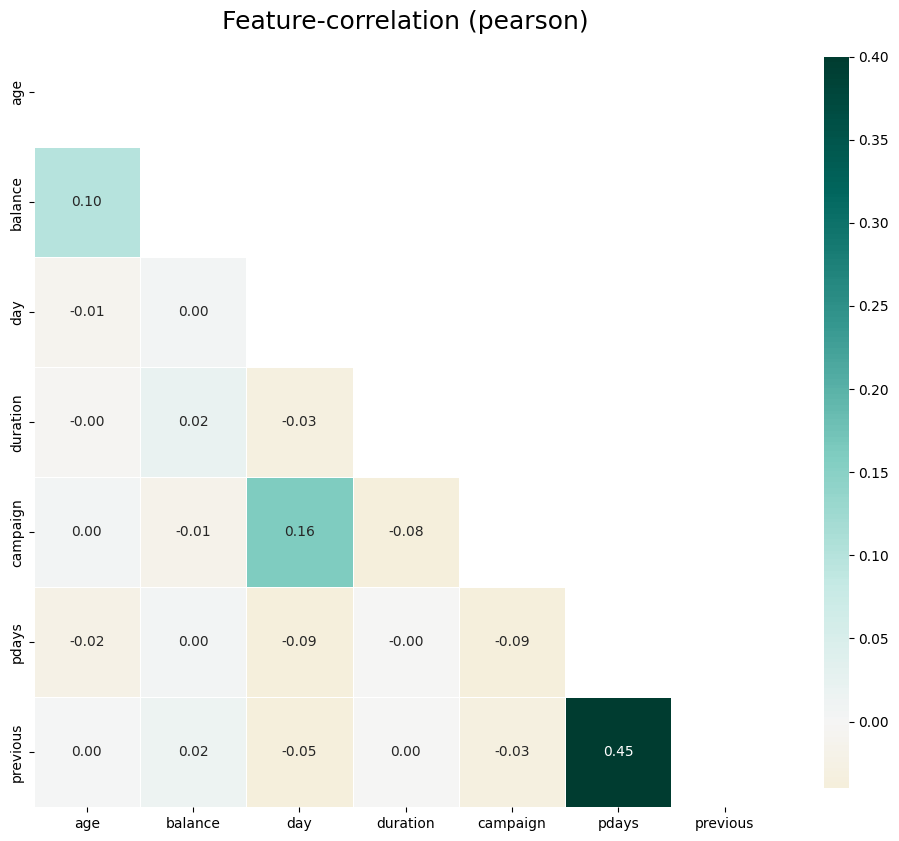

In [12]:
klib.corr_plot(bank[num_vars])

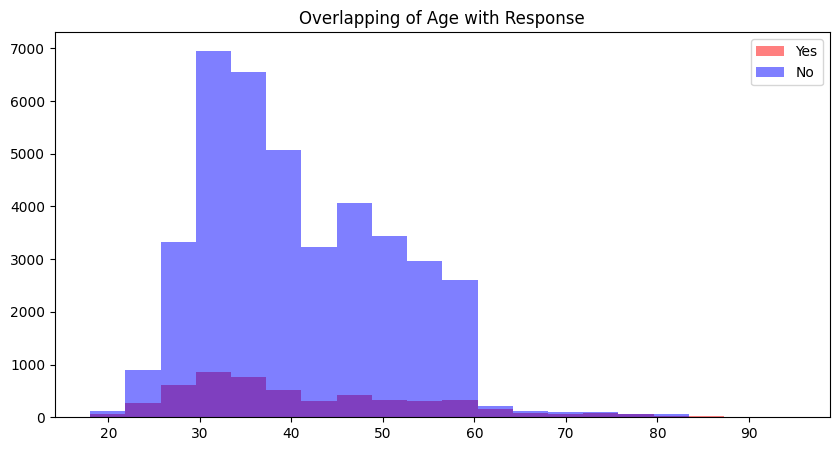

In [13]:
# Create an overlap histogram of the Ages with Response

age_yes = bank[bank['y'] == 'yes'][['age', 'y']]
age_no = bank[bank['y'] == 'no'][['age', 'y']]

plt.figure(figsize = (10,5))
plt.hist(age_yes['age'], alpha = 0.5, label='Yes', color='red', bins=20)
plt.hist(age_no['age'], alpha = 0.5, label='No', color='blue', bins=20)
plt.legend(loc='upper right')
plt.title('Overlapping of Age with Response')
plt.show()

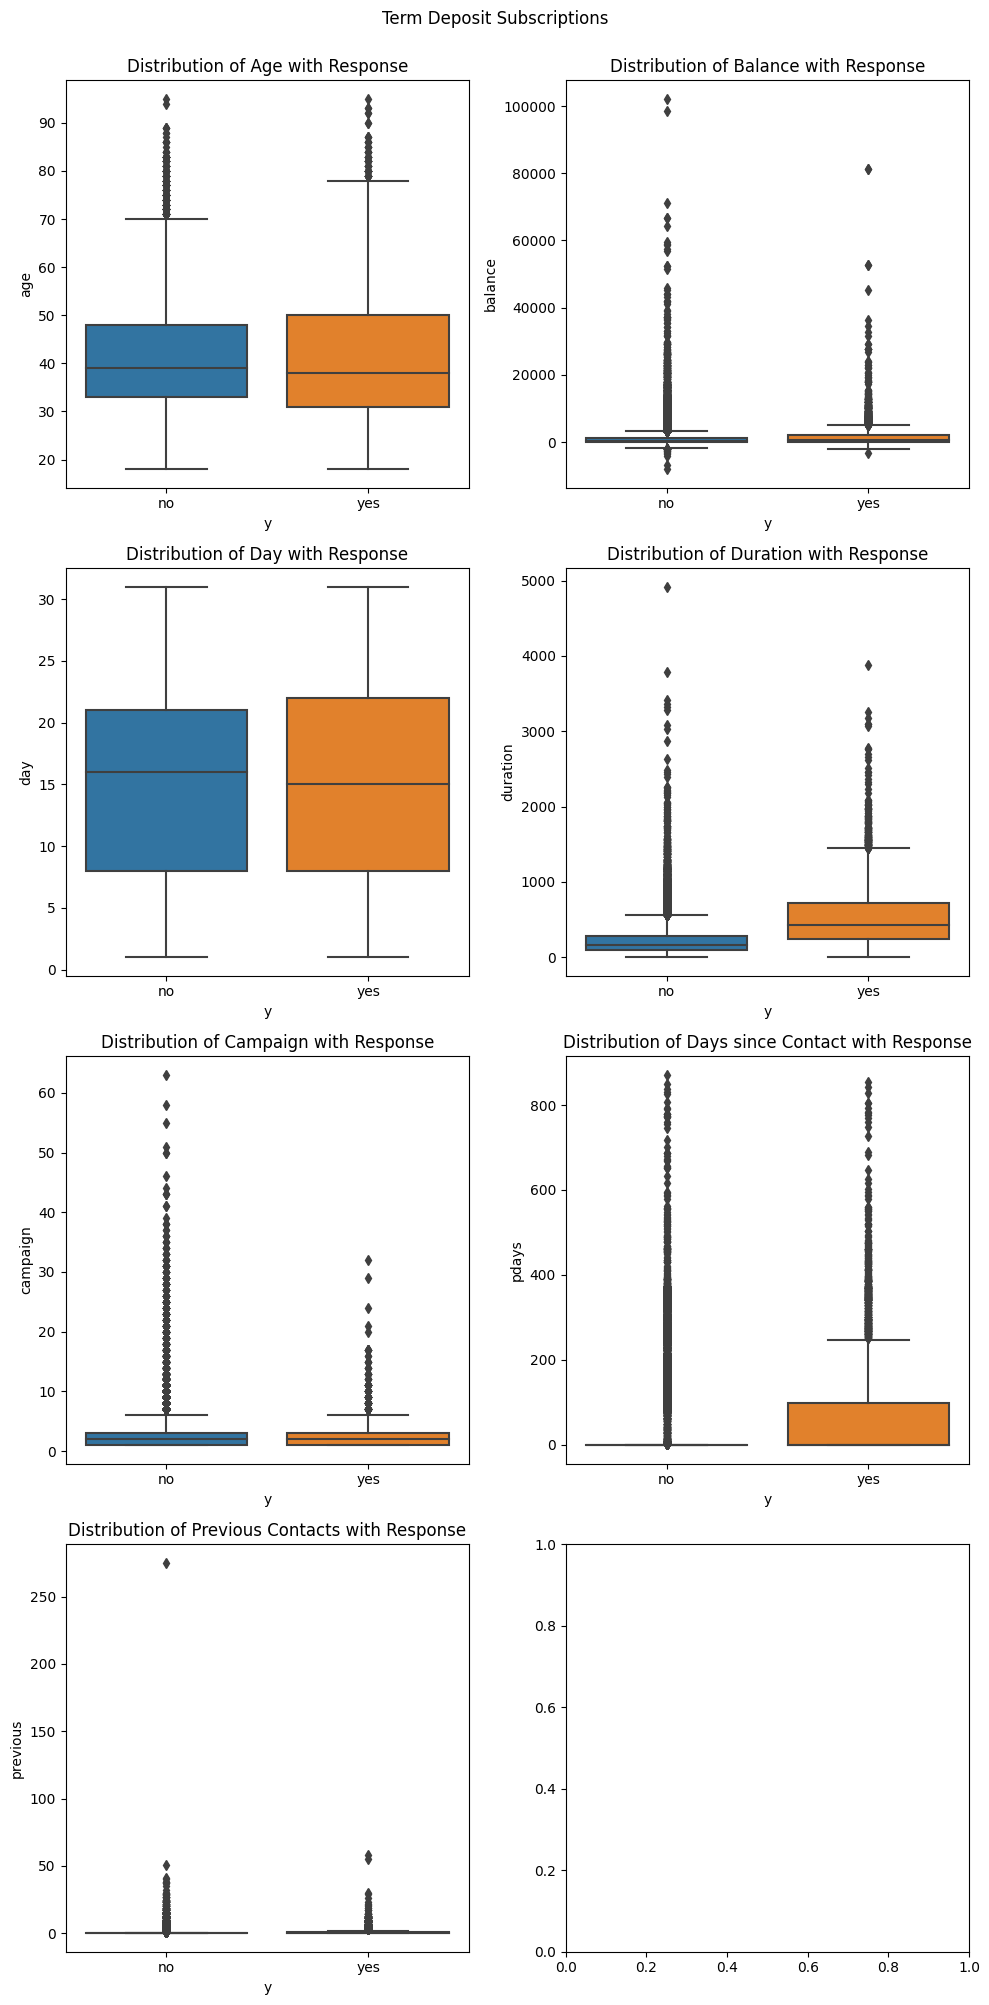

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))
fig.suptitle('Term Deposit Subscriptions', y=1)

# plotting by age
ax0 = sns.boxplot(y="age", x='y', data=bank, ax = axes[0][0])
ax0.set_title('Distribution of Age with Response')

# plotting by balance
ax1 = sns.boxplot(y="balance", x='y', data=bank, ax = axes[0][1])
ax1.set_title('Distribution of Balance with Response')

# plotting by day
ax2 = sns.boxplot(y="day", x='y', data=bank, ax = axes[1][0])
ax2.set_title('Distribution of Day with Response')

# plotting by duration
ax3 = sns.boxplot(y="duration", x='y', data=bank, ax = axes[1][1])
ax3.set_title('Distribution of Duration with Response')

# plotting by campaign
ax4 = sns.boxplot(y="campaign", x='y', data=bank, ax = axes[2][0])
ax4.set_title('Distribution of Campaign with Response')

# plotting by pdays
ax5 = sns.boxplot(y="pdays", x='y', data=bank, ax = axes[2][1])
ax5.set_title('Distribution of Days since Contact with Response')

# plotting by previous
ax6 = sns.boxplot(y="previous", x='y', data=bank, ax = axes[3][0])
ax6.set_title('Distribution of Previous Contacts with Response')

plt.tight_layout()
plt.show()

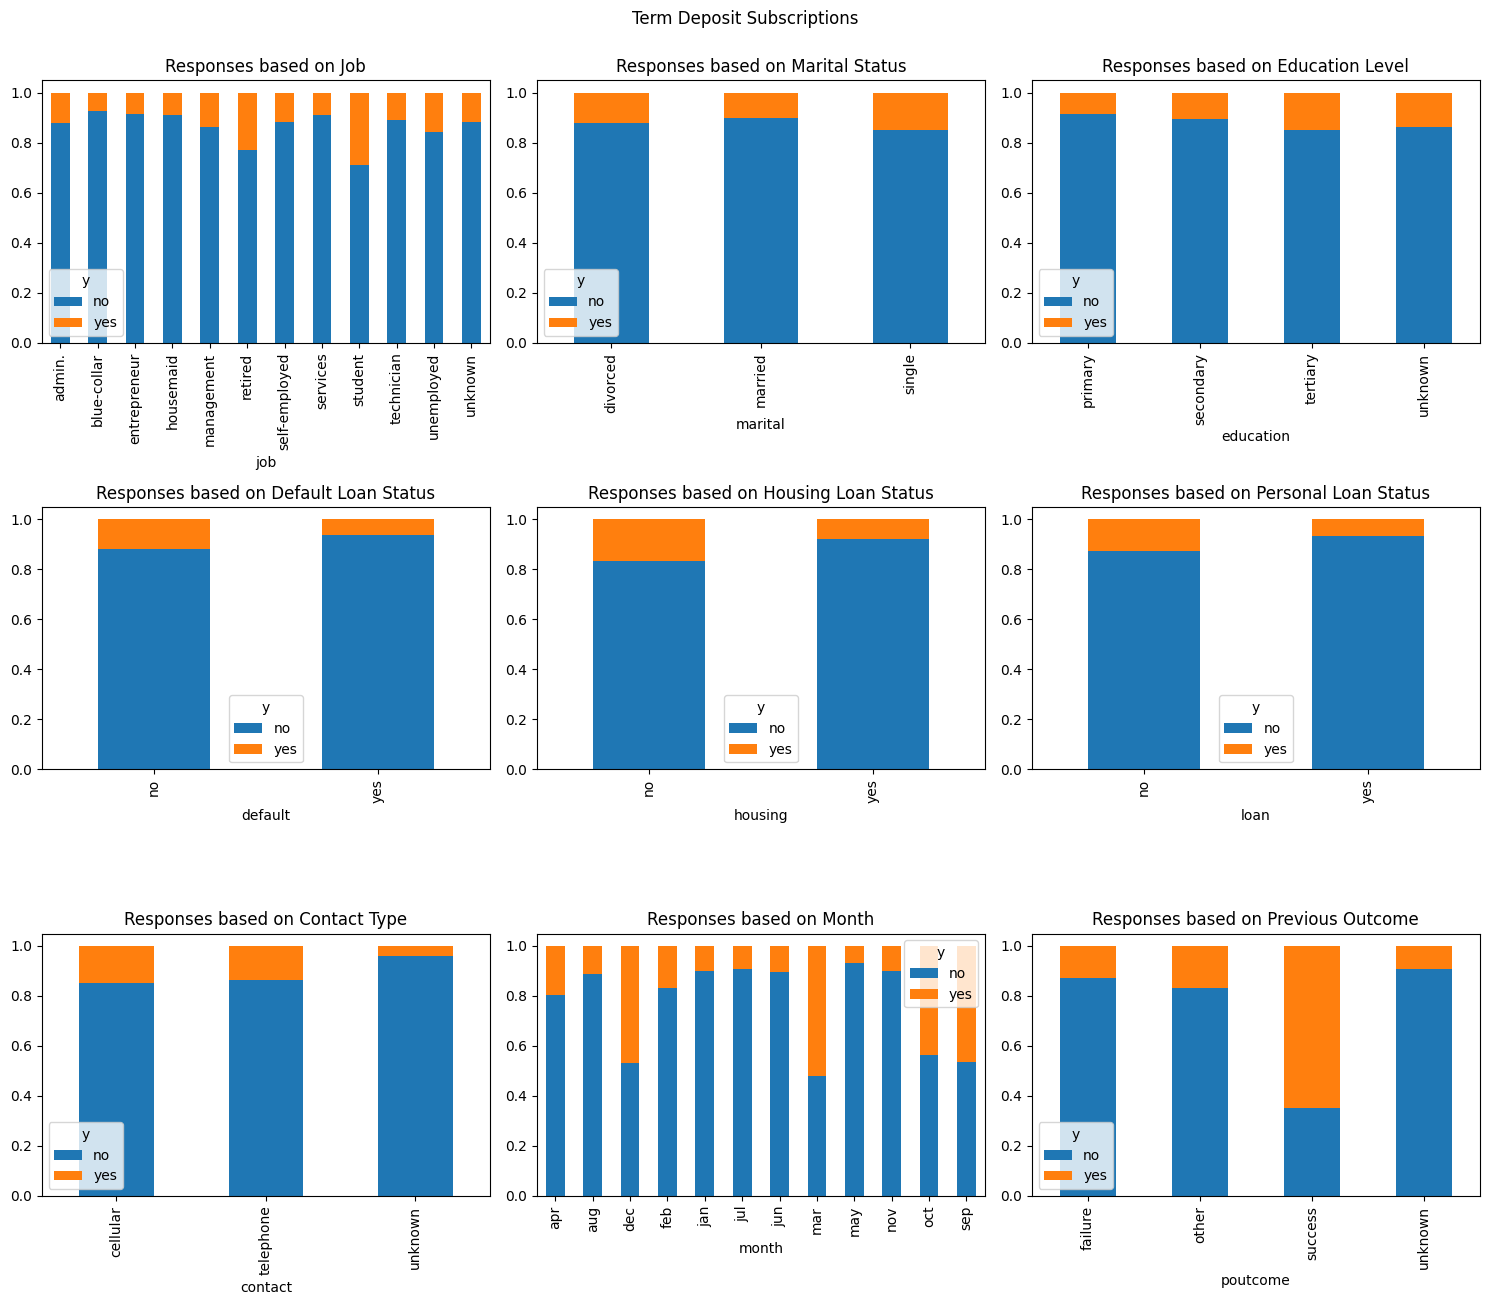

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))
fig.suptitle('Term Deposit Subscriptions', y=1)

# plotting by job
ax0 = pd.crosstab(bank['job'], bank['y'])
ax0 = ax0.div(ax0.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[0][0])
ax0.set_title('Responses based on Job')

# plotting by marital
ax1 = pd.crosstab(bank['marital'], bank['y'])
ax1 = ax1.div(ax1.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[0][1])
ax1.set_title('Responses based on Marital Status')

# plotting by education
ax2 = pd.crosstab(bank['education'], bank['y'])
ax2 = ax2.div(ax2.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[0][2])
ax2.set_title('Responses based on Education Level')

# plotting by default
ax3 = pd.crosstab(bank['default'], bank['y'])
ax3 = ax3.div(ax3.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[1][0])
ax3.set_title('Responses based on Default Loan Status')

# plotting by housing
ax4 = pd.crosstab(bank['housing'], bank['y'])
ax4 = ax4.div(ax4.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[1][1])
ax4.set_title('Responses based on Housing Loan Status')

# plotting by loan
ax5 = pd.crosstab(bank['loan'], bank['y'])
ax5 = ax5.div(ax5.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[1][2])
ax5.set_title('Responses based on Personal Loan Status')

# plotting by contact
ax6 = pd.crosstab(bank['contact'], bank['y'])
ax6 = ax6.div(ax6.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[2][0])
ax6.set_title('Responses based on Contact Type')

# plotting by month
ax7 = pd.crosstab(bank['month'], bank['y'])
ax7 = ax7.div(ax7.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[2][1])
ax7.set_title('Responses based on Month')

# plotting by poutcome
ax8 = pd.crosstab(bank['poutcome'], bank['y'])
ax8 = ax8.div(ax8.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[2][2])
ax8.set_title('Responses based on Previous Outcome')

plt.tight_layout()
plt.show()

# Part 2 Data Preprocessing

In [16]:
bank['pdays'] = bank['pdays'].replace(-1, 0)

## Split the dataset

In [17]:
# train (60%), validation (30%), test (10%) 
X = bank.drop(columns=['y'])
y = bank[['y']]
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size = 0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.25, random_state=1)

In [18]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
23520,34,technician,single,tertiary,yes,-6,no,no,cellular,28,aug,79,8,0,0,unknown
14941,58,housemaid,single,tertiary,no,145,yes,yes,cellular,16,jul,128,2,0,0,unknown
40686,38,admin.,married,tertiary,no,4297,no,no,cellular,7,aug,206,2,0,0,unknown
29432,32,self-employed,married,tertiary,no,428,no,yes,cellular,3,feb,142,2,0,0,unknown
840,49,blue-collar,married,secondary,no,64,yes,no,unknown,7,may,293,3,0,0,unknown


In [19]:
# using the yeojohnson transformation because it can take both negative and postive numbers
X_train[num_vars] = X_train[num_vars].apply(lambda x: yeojohnson(x)[0] , axis=0)
X_test[num_vars] = X_test[num_vars].apply(lambda x: yeojohnson(x)[0] , axis=0)
X_val[num_vars] = X_val[num_vars].apply(lambda x: yeojohnson(x)[0] , axis=0)

## Scaling

In [20]:
# Redefine cat_vars to not include the response variable
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create pipelines for cat and num variables
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])
num_pipe = Pipeline([('standardize', StandardScaler())])

# Combine pipelines using ColumnTransformer
all_pipe = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, cat_vars),
        ('num', num_pipe, num_vars)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_trans = all_pipe.fit_transform(X_train)

# Get feature names for one-hot encoded cat variables
cat_encoder = all_pipe.named_transformers_['cat'].named_steps['encoder']
cat_encoder.fit(X_train[cat_vars])

# get cat feature names
cat_col_names = cat_encoder.get_feature_names_out(cat_vars)

# all feature names
all_col_names = list(cat_col_names) + num_vars

# Reassign the column names to the transformed datasets
X_train_trans = pd.DataFrame(X_train_trans, columns=all_col_names)
X_val_trans = pd.DataFrame(all_pipe.transform(X_val), columns=all_col_names)
X_test_trans = pd.DataFrame(all_pipe.transform(X_test), columns=all_col_names)


In [22]:
X_train_trans

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.585290,-0.433445,1.376543,-0.886337,1.702620,-0.472660,-0.472783
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.472928,-0.334094,0.106335,-0.400598,0.125236,-0.472660,-0.472783
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.141070,1.076134,-1.047777,0.112729,0.125236,-0.472660,-0.472783
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.830866,-0.202331,-1.689641,-0.291592,0.125236,-0.472660,-0.472783
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.843488,-0.378788,-1.047777,0.515790,0.729904,-0.472660,-0.472783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.919889,0.315921,-0.129305,0.612370,0.729904,-0.472660,-0.472783
27122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.585290,-0.160072,0.220930,0.251362,0.125236,-0.472660,-0.472783
27123,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.765233,1.045440,0.661153,0.770854,1.485425,-0.472660,-0.472783
27124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.518475,0.300144,0.553585,-2.528253,1.889098,-0.472660,-0.472783


In [30]:
X_train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27126 entries, 0 to 27125
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_admin.           27126 non-null  float64
 1   job_blue-collar      27126 non-null  float64
 2   job_entrepreneur     27126 non-null  float64
 3   job_housemaid        27126 non-null  float64
 4   job_management       27126 non-null  float64
 5   job_retired          27126 non-null  float64
 6   job_self-employed    27126 non-null  float64
 7   job_services         27126 non-null  float64
 8   job_student          27126 non-null  float64
 9   job_technician       27126 non-null  float64
 10  job_unemployed       27126 non-null  float64
 11  job_unknown          27126 non-null  float64
 12  marital_divorced     27126 non-null  float64
 13  marital_married      27126 non-null  float64
 14  marital_single       27126 non-null  float64
 15  education_primary    27126 non-null 

In [34]:
# Convert 'no' to 0 and 'yes' to 1 in y_train
y_train['y'] = y_train['y'].map({'no': 0, 'yes': 1})

## Balancing

In [35]:
# Combine the transformed X_train and y_train into a single DataFrame
X_train_trans.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
balanced_train_data = pd.concat([X_train_trans, y_train], axis=1)

# Separate the majority (0) and minority (1) classes
major_class = balanced_train_data[balanced_train_data['y'] == 0]
minor_class = balanced_train_data[balanced_train_data['y'] == 1]

In [36]:
balanced_train_data

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-0.585290,-0.433445,1.376543,-0.886337,1.702620,-0.472660,-0.472783,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.472928,-0.334094,0.106335,-0.400598,0.125236,-0.472660,-0.472783,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.141070,1.076134,-1.047777,0.112729,0.125236,-0.472660,-0.472783,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-0.830866,-0.202331,-1.689641,-0.291592,0.125236,-0.472660,-0.472783,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.843488,-0.378788,-1.047777,0.515790,0.729904,-0.472660,-0.472783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.919889,0.315921,-0.129305,0.612370,0.729904,-0.472660,-0.472783,0
27122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.585290,-0.160072,0.220930,0.251362,0.125236,-0.472660,-0.472783,0
27123,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.765233,1.045440,0.661153,0.770854,1.485425,-0.472660,-0.472783,0
27124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.518475,0.300144,0.553585,-2.528253,1.889098,-0.472660,-0.472783,0


#### Oversampling minority class

In [37]:
# Oversample the minority class to match the number of majority class samples
minor_class_over = resample(minor_class, replace=True, n_samples=len(major_class), random_state=1)

# Combine the oversampled minority class with the majority class
train_data_over = pd.concat([major_class, minor_class_over])

# Separate the features (X) and the target (y) from the balanced training data
X_train_over = train_data_over.drop(columns=['y'])
y_train_over = train_data_over[['y']]

In [40]:
X_train_over

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.585290,-0.433445,1.376543,-0.886337,1.702620,-0.472660,-0.472783
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.472928,-0.334094,0.106335,-0.400598,0.125236,-0.472660,-0.472783
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.830866,-0.202331,-1.689641,-0.291592,0.125236,-0.472660,-0.472783
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.843488,-0.378788,-1.047777,0.515790,0.729904,-0.472660,-0.472783
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.585290,0.067492,0.553585,0.155356,-1.114745,-0.472660,-0.472783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.094962,2.285978,0.333584,1.937783,-1.114745,-0.472660,-0.472783
24071,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-2.210882,-0.175111,-1.515550,1.480010,-1.114745,-0.472660,-0.472783
10580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.960441,-0.315780,-0.250721,0.280283,0.125236,2.110895,2.145573
4898,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.141070,-0.424220,-0.250721,1.243006,0.125236,-0.472660,-0.472783


In [41]:
y_train_over

,y
0,0
1,0
3,0
4,0
5,0
...,...
3792,1
24071,1
10580,1
4898,1


#### Undersampling majority class

In [38]:
# Oversample the minority class to match the number of majority class samples
major_class_under = resample(major_class, replace=True, n_samples=len(minor_class), random_state=1)

# Combine the oversampled minority class with the majority class
train_data_under = pd.concat([minor_class, major_class_under])

# Separate the features (X) and the target (y) from the balanced training data
X_train_under = train_data_under.drop(columns=['y'])
y_train_under = train_data_under[['y']]

In [42]:
X_train_under

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.141070,1.076134,-1.047777,0.112729,0.125236,-0.472660,-0.472783
16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.518475,0.604624,1.376543,0.757472,0.125236,2.123786,2.019955
26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.690280,0.544217,0.333584,0.416164,-1.114745,-0.472660,-0.472783
30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.157689,-0.424220,0.220930,0.519787,1.086134,2.098396,2.174974
49,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.234786,0.778642,0.871895,-0.337129,-1.114745,2.128832,2.145573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.518475,1.073822,-0.766399,0.888964,-1.114745,-0.472660,-0.472783
7596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-1.094962,-0.282781,-0.374836,0.907223,-1.114745,-0.472660,-0.472783
8158,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-2.029069,-0.001406,1.376543,0.079816,1.086134,-0.472660,-0.472783
17265,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.685040,1.725698,0.220930,-0.073400,0.125236,-0.472660,-0.472783


In [43]:
y_train_under

,y
2,1
16,1
26,1
30,1
49,1
...,...
17421,0
7596,0
8158,0
17265,0
